In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Plot simulations with the following identifying numbers
old_sims = [] # Sims with ID < 20 have 5kb resolution. Put their IDs here.
new_sims = [441]

### Move simulation data from discovery to local machine.

In [3]:
import subprocess
scp_list = [440,441] # Fill list with integers that identify the simulations you want P vs d for
for i in scp_list:
    cis_from = f'white.do@xfer.discovery.neu.edu:/work/dipierrolab/douglas/PvsGenomic/PBBvsGenomic_directory_{i}.txt'
    trans_from = f'white.do@xfer.discovery.neu.edu:/work/dipierrolab/douglas/PvsGenomic/transPBBvsGenomic_directory_{i}.txt'
    HiC_from = f'white.do@xfer.discovery.neu.edu:/work/dipierrolab/douglas/final_Hi-C_maps/Hi-C_directory_{i}.png'
    to = '/Users/douglas/Documents/Features_Transfer/store_Ps_vs_genomic_graphs'
    HiC_to = '/Users/douglas/Desktop'
    subprocess.run(['scp', cis_from, to])
    subprocess.run(['scp', trans_from, to])
    # subprocess.run(['scp', HiC_from, HiC_to])
    print(i)

440
441


### Functions

In [4]:
def rebin(array_like, old_bins_per_new_bin):
    N = len(array_like)
    rebinned_list = []
    for i in range(round(N/old_bins_per_new_bin)):
        new_element = 0
        for j in range(old_bins_per_new_bin):
            new_element += array_like[old_bins_per_new_bin*i+j]
        new_element /= old_bins_per_new_bin # Sets the first bin's probability to 1
        rebinned_list.append(new_element)
    rebinned_array = np.array(rebinned_list)
    return rebinned_array

# Experiment binned at 1kb, old sims at 5kb (per bead), new sims at 500bp (per bead)
# To get the same bin size of 5kb for all of them, rebin accordingly:
#                                                         old_bins_per_new_bin = 5  for experiment
#                                                         old_bins_per_new_bin = 1  for old sims
#                                                         old_bins_per_new_bin = 10  for new sims

### Load experimental data.

In [15]:
# Cis
exp_cis_path = '/Users/douglas/Documents/Features_Transfer/figures/chr2_1kbRes_cis_P_vs_d.txt'
P_cis_experiment = rebin(np.loadtxt(exp_cis_path), 5)
P_cis_experiment /= P_cis_experiment[1]

# Trans
exp_trans_path = '/Users/douglas/Documents/Features_Transfer/figures/chr2_1kbRes_trans_P_vs_d.txt'
P_trans_experiment = rebin(np.loadtxt(exp_trans_path), 5)
P_trans_experiment /= P_cis_experiment[1]

### Load simulation P vs d data.

In [16]:
sim_path = '/Users/douglas/Documents/Features_Transfer/store_Ps_vs_genomic_graphs/'

# Lists of file names
old_cis_file_names = [sim_path+f'PvsGenomic_directory_{i}.txt' for i in old_sims]
old_trans_file_names = [sim_path+f'transPvsGenomic_directory_{i}.txt' for i in old_sims]
new_cis_file_names = [sim_path+f'PvsGenomic_directory_{i}.txt' for i in new_sims]
new_trans_file_names = [sim_path+f'transPvsGenomic_directory_{i}.txt' for i in new_sims]
new_cis_file_names_AA = [sim_path+f'PAAvsGenomic_directory_{i}.txt' for i in new_sims]
new_trans_file_names_AA = [sim_path+f'transPAAvsGenomic_directory_{i}.txt' for i in new_sims]
new_cis_file_names_BB = [sim_path+f'PBBvsGenomic_directory_{i}.txt' for i in new_sims]
new_trans_file_names_BB = [sim_path+f'transPBBvsGenomic_directory_{i}.txt' for i in new_sims]


# Load the files into an list (of arrays) 
old_cis_matrices = [rebin(np.loadtxt(file_name), 1) for file_name in old_cis_file_names]
old_trans_matrices = [rebin(np.loadtxt(file_name), 1) for file_name in old_trans_file_names]
new_cis_matrices = [rebin(np.loadtxt(file_name), 10) for file_name in new_cis_file_names]
new_trans_matrices = [rebin(np.loadtxt(file_name), 10) for file_name in new_trans_file_names]
new_cis_matrices_AA = [rebin(np.loadtxt(file_name), 10) for file_name in new_cis_file_names_AA]
new_trans_matrices_AA = [rebin(np.loadtxt(file_name), 10) for file_name in new_trans_file_names_AA]
new_cis_matrices_BB = [rebin(np.loadtxt(file_name), 10) for file_name in new_cis_file_names_BB]
new_trans_matrices_BB = [rebin(np.loadtxt(file_name), 10) for file_name in new_trans_file_names_BB]

### Rescale simulation to compare better with experiment

In [17]:
pos = 1 # bin at which to equate cis experiment and cis simulation

if len(old_cis_matrices) !=0:
    for i in range(len(old_cis_matrices)):
        rescale_factor = P_cis_experiment[pos]/old_cis_matrices[i][pos]
        old_cis_matrices[i] *= rescale_factor
        old_trans_matrices[i] *= rescale_factor

if len(new_cis_matrices) !=0:
    for i in range(len(new_cis_matrices)):
        rescale_factor = P_cis_experiment[pos]/new_cis_matrices[i][pos]
        new_cis_matrices[i] *= rescale_factor
        new_trans_matrices[i] *= rescale_factor

if len(new_cis_matrices_AA) !=0:
    for i in range(len(new_cis_matrices_AA)):
        rescale_factor = P_cis_experiment[pos]/new_cis_matrices[i][pos]
        new_cis_matrices_AA[i] *= rescale_factor
        new_trans_matrices_AA[i] *= rescale_factor

if len(new_cis_matrices_BB) !=0:
    for i in range(len(new_cis_matrices_BB)):
        rescale_factor = P_cis_experiment[pos]/new_cis_matrices[i][pos]
        new_cis_matrices_BB[i] *= rescale_factor
        new_trans_matrices_BB[i] *= rescale_factor

### Make genomic distance arrays

In [18]:
N_exp = len(P_cis_experiment)
if len(old_cis_matrices) !=0:
    N_old_sim = len(old_cis_matrices[0])
else:
    N_old_sim = 0

if len(new_cis_matrices) !=0:
    N_new_sim = len(new_cis_matrices[0])
else:
    N_new_sim = 0

# 5* makes each bin 5kb
d_exp = 5*np.arange(N_exp)
d_old_sim = 5*np.arange(N_old_sim)
d_new_sim = 5*np.arange(N_new_sim)

## Plot P vs d

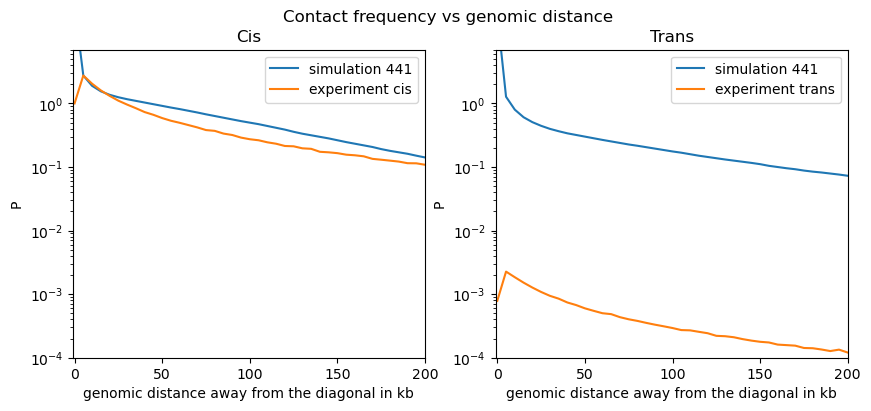

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle('Contact frequency vs genomic distance')

#Plot simulation P vs d
for i in range(len(old_sims)):
    ax1.plot(d_old_sim, old_cis_matrices[i], label='simulation '+str(old_sims[i]))

for i in range(len(old_sims)):
    ax2.plot(d_old_sim, old_trans_matrices[i], label='simulation '+str(old_sims[i]))

for i in range(len(new_sims)):
    ax1.plot(d_new_sim, new_cis_matrices[i], label='simulation '+str(new_sims[i]))

for i in range(len(new_sims)):
    ax2.plot(d_new_sim, new_trans_matrices[i], label='simulation '+str(new_sims[i]))

# Plot experimental P vs d
ax1.plot(d_exp, P_cis_experiment, label='experiment cis')
ax2.plot(d_exp, P_trans_experiment, label='experiment trans')

# Plot settings
ax1.set_title('Cis')
ax2.set_title('Trans')
ax1.legend()
ax2.legend()

for ax in {ax1,ax2}:
    ax.set_xlabel('genomic distance away from the diagonal in kb')
    ax.set_xscale('log')
    ax.set_ylabel('P')
    ax.set_yscale('log')

plt.setp((ax1, ax2), xlim=(-1,200), ylim=(1e-4,7e0))
plt.show()

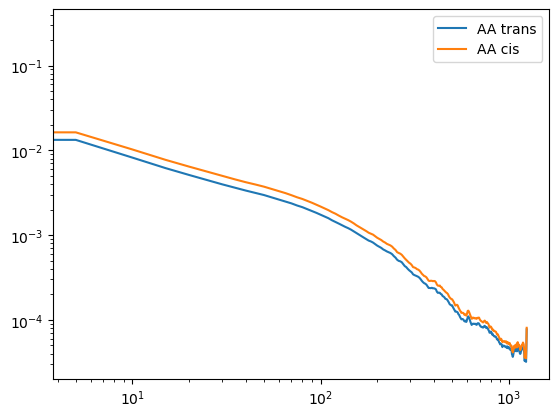

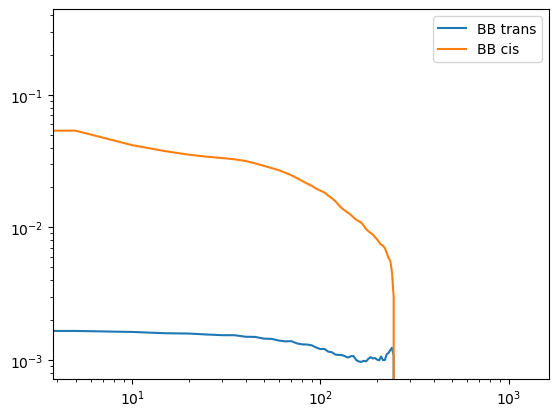

In [10]:
plt.plot(d_new_sim,new_trans_matrices_AA[0],label='AA trans')
plt.plot(d_new_sim,new_cis_matrices_AA[0],label='AA cis')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

plt.plot(d_new_sim,new_trans_matrices_BB[0],label='BB trans')
plt.plot(d_new_sim,new_cis_matrices_BB[0],label='BB cis')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()